In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import glob, os
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
train_parent_dir = "gdrive/My Drive/Datasets/EE610: Image Processing/train"
test_parent_dir = "gdrive/My Drive/Datasets/EE610: Image Processing/val"
img_directory = "image"
depth_directory = "depth"

train_img_path = os.path.join(train_parent_dir, img_directory)
train_img_path_files = os.listdir(train_img_path)
# sorting the files based on their filenames
train_img_path_files = sorted(train_img_path_files,key=lambda i: int(os.path.splitext(i)[0]))
train_images=[]
for i in train_img_path_files:
  train_images.append(os.path.join(train_img_path,i))

train_depth_path = os.path.join(train_parent_dir, depth_directory)
train_depth_path_files = os.listdir(train_depth_path)
train_depth_path_files = sorted(train_depth_path_files,key=lambda i: int(os.path.splitext(i)[0]))
train_depths=[]
for i in train_depth_path_files:
  train_depths.append(os.path.join(train_depth_path,i))

test_img_path = os.path.join(test_parent_dir, img_directory)
test_img_path_files = os.listdir(test_img_path)
test_img_path_files = sorted(test_img_path_files,key=lambda i: int(os.path.splitext(i)[0]))
test_images=[]
for i in test_img_path_files:
  test_images.append(os.path.join(test_img_path,i))

test_depth_path = os.path.join(test_parent_dir, depth_directory)
test_depth_path_files = os.listdir(test_depth_path)
test_depth_path_files = sorted(test_depth_path_files,key=lambda i: int(os.path.splitext(i)[0]))
test_depths=[]
for i in test_depth_path_files:
  test_depths.append(os.path.join(test_depth_path,i))

number_of_train_data = len(train_images)
number_of_test_data = len(test_images)

print(number_of_train_data,number_of_test_data)

2975 500


In [ ]:
train_images[123],test_images[345],train_depths[43],test_depths[25]

('gdrive/My Drive/Datasets/EE610: Image Processing/train/image/123.npy',
 'gdrive/My Drive/Datasets/EE610: Image Processing/val/image/345.npy',
 'gdrive/My Drive/Datasets/EE610: Image Processing/train/depth/43.npy',
 'gdrive/My Drive/Datasets/EE610: Image Processing/val/depth/25.npy')

In [ ]:
train_img = [np.load(train_images[i]) for i in range(number_of_train_data)]
print(np.array(train_img).shape)
test_img = [np.load(test_images[i]) for i in range(number_of_test_data)]
print(np.array(test_img).shape)

(2975, 128, 256, 3)
(500, 128, 256, 3)


In [ ]:
train_depth  = [np.load(train_depths[i]) for i in range(len(train_depths))]
print(np.array(train_depth).shape)
test_depth  = [np.load(test_depths[i]) for i in range(len(test_depths))]
print(np.array(test_depth).shape)

(2975, 128, 256, 1)
(500, 128, 256, 1)


In [ ]:
X_train = np.asarray(train_img)
y_train = np.asarray(train_depth)
X_test = np.asarray(test_img)
y_test = np.asarray(test_depth)

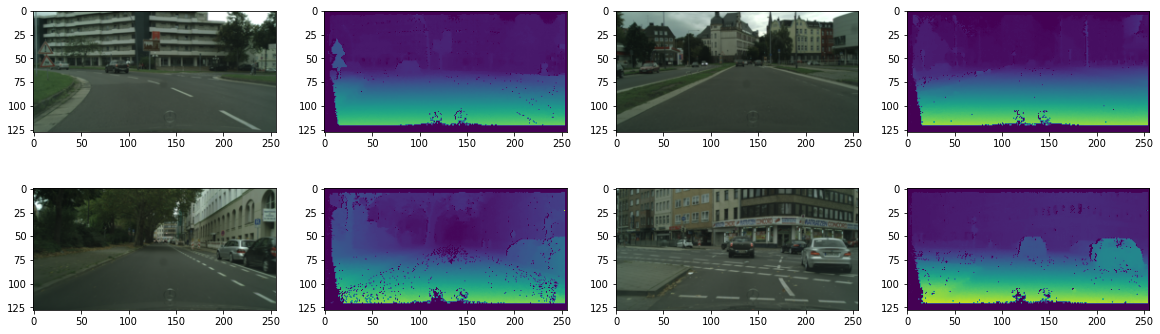

In [ ]:
image_disp = X_train[:4,:,:,:]
depth_disp = y_train[:4,:,:,:].squeeze()

plt.figure(figsize=(20,6))

plt.subplot(2,4,1)
plt.imshow(image_disp[0,:,:,:])
plt.subplot(2,4,2)
plt.imshow(depth_disp[0,:,:])

plt.subplot(2,4,3)
plt.imshow(image_disp[1,:,:,:])
plt.subplot(2,4,4)
plt.imshow(depth_disp[1,:,:])

plt.subplot(2,4,5)
plt.imshow(image_disp[2,:,:,:])
plt.subplot(2,4,6)
plt.imshow(depth_disp[2,:,:])

plt.subplot(2,4,7)
plt.imshow(image_disp[3,:,:,:])
plt.subplot(2,4,8)
plt.imshow(depth_disp[3,:,:])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=43, shuffle=True)

In [ ]:
def generator(X_data, y_data, batch_size):

  samples_per_epoch = X_data.shape[0]
  number_of_batches = samples_per_epoch/batch_size
  counter=0

  while 1:

    X_batch = np.array(X_data[batch_size*counter:batch_size*(counter+1)]).astype('float32')
    y_batch = np.array(y_data[batch_size*counter:batch_size*(counter+1)]).astype('float32')
    counter += 1
    yield X_batch,y_batch

    #restart counter to yeild data in the next epoch as well
    if counter >= number_of_batches:
        counter = 0

In [ ]:
inputs = keras.Input(shape=(128, 256, 3))

e1 = layers.Conv2D(filters= 8, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(inputs)
b1 = layers.BatchNormalization()(e1)
p1 = layers.Dropout(rate=0.2, seed=43)(b1)
m1 = layers.MaxPool2D(pool_size=(2,2), strides=None, padding='same')(p1)

e2 = layers.Conv2D(filters= 16, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(m1)
b2 = layers.BatchNormalization()(e2)
p2 = layers.Dropout(rate=0.2, seed=43)(b2)
m2 = layers.MaxPool2D(pool_size=(2,2), strides=None, padding='same')(p2)

e3 = layers.Conv2D(filters= 32, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(m2)
b3 = layers.BatchNormalization()(e3)
p3 = layers.Dropout(rate=0.2, seed=43)(b3)
m3 = layers.MaxPool2D(pool_size=(2,2), strides=None, padding='same')(p3)

e4 = layers.Conv2D(filters= 64, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(m3)
b4 = layers.BatchNormalization()(e4)
p4 = layers.Dropout(rate=0.2, seed=43)(b4)
m4 = layers.MaxPool2D(pool_size=(2,2), strides=None, padding='same')(p4)

e5 = layers.Conv2D(filters= 128, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(m4)


d5 = layers.Conv2DTranspose(filters= 64, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(e5)
a5 = layers.Add()([d5,m4])
b5 = layers.BatchNormalization()(a5)
p5 = layers.Dropout(rate=0.2, seed=43)(b5)
u5 = layers.UpSampling2D(size=(2,2), interpolation="bilinear")(p5)

d4 = layers.Conv2DTranspose(filters= 32, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(u5)
a4 = layers.Add()([d4,m3])
b4 = layers.BatchNormalization()(a4)
p4 = layers.Dropout(rate=0.2, seed=43)(b4)
u4 = layers.UpSampling2D(size=(2,2), interpolation="bilinear")(p4)

d3 = layers.Conv2DTranspose(filters= 16, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(u4)
a3 = layers.Add()([d3,m2])
b5 = layers.BatchNormalization()(a3)
p5 = layers.Dropout(rate=0.2, seed=43)(b5)
u3 = layers.UpSampling2D(size=(2,2), interpolation="bilinear")(p5)

d2 = layers.Conv2DTranspose(filters= 8, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(u3)
a2 = layers.Add()([d2,m1])
b6 = layers.BatchNormalization()(a2)
p6 = layers.Dropout(rate=0.2, seed=43)(b6)
u2 = layers.UpSampling2D(size=(2,2), interpolation="bilinear")(p6)

d1 = layers.Conv2D(filters= 1, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(u2)


model = keras.Model(inputs=inputs, outputs=d1, name="skip_connection_model")
model.summary()

Model: "skip_connection_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_10 (Conv2D)             (None, 128, 256, 8)  224         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_10 (BatchN  (None, 128, 256, 8)  32         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                              

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

batch_size = 32
history = model.fit_generator(generator(X_train, y_train, batch_size), steps_per_epoch= X_train.shape[0]//batch_size, epochs=10, verbose=1,
                    validation_data=generator(X_val, y_val, batch_size), validation_steps= X_val.shape[0]//batch_size, shuffle=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
79/79 [==============================] - 158s 2s/step - loss: 0.1010 - accuracy: 0.1594 - val_loss: 0.0290 - val_accuracy: 0.1771
Epoch 2/10
79/79 [==============================] - 155s 2s/step - loss: 0.0241 - accuracy: 0.1754 - val_loss: 0.0263 - val_accuracy: 0.1776
Epoch 3/10
79/79 [==============================] - 155s 2s/step - loss: 0.0173 - accuracy: 0.1770 - val_loss: 0.0180 - val_accuracy: 0.1795
Epoch 4/10
79/79 [==============================] - 157s 2s/step - loss: 0.0141 - accuracy: 0.1774 - val_loss: 0.0145 - val_accuracy: 0.1800
Epoch 5/10
79/79 [==============================] - 156s 2s/step - loss: 0.0118 - accuracy: 0.1776 - val_loss: 0.0153 - val_accuracy: 0.1791
Epoch 6/10
79/79 [==============================] - 156s 2s/step - loss: 0.0102 - accuracy: 0.1778 - val_loss: 0.0136 - val_accuracy: 0.1795
Epoch 7/10
79/79 [==============================] - 155s 2s/step - loss: 0.0091 - accuracy: 0.1778 - val_loss: 0.0278 - val_accuracy: 0.1736
Epoch 8/10
79

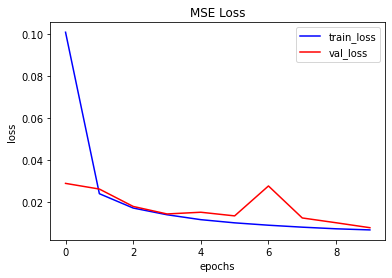

In [ ]:
plt.plot(history.history['loss'], color = "blue", label = "train_loss")
plt.plot(history.history['val_loss'], color = "red", label = "val_loss")
plt.title("MSE Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

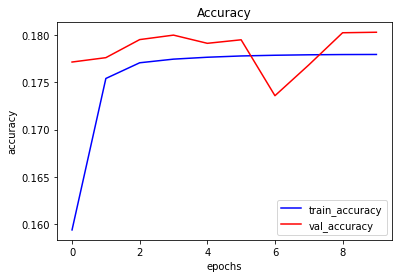

In [ ]:
plt.plot(history.history['accuracy'], color = "blue", label = "train_accuracy")
plt.plot(history.history['val_accuracy'], color = "red", label = "val_accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
evalutation = model.evaluate_generator(generator(X_test, y_test, batch_size), steps=X_test.shape[0]//batch_size, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


15/15 [==============================] - 8s 551ms/step - loss: 0.0087 - accuracy: 0.1891


In [ ]:
prediction = model.predict(X_test, batch_size)

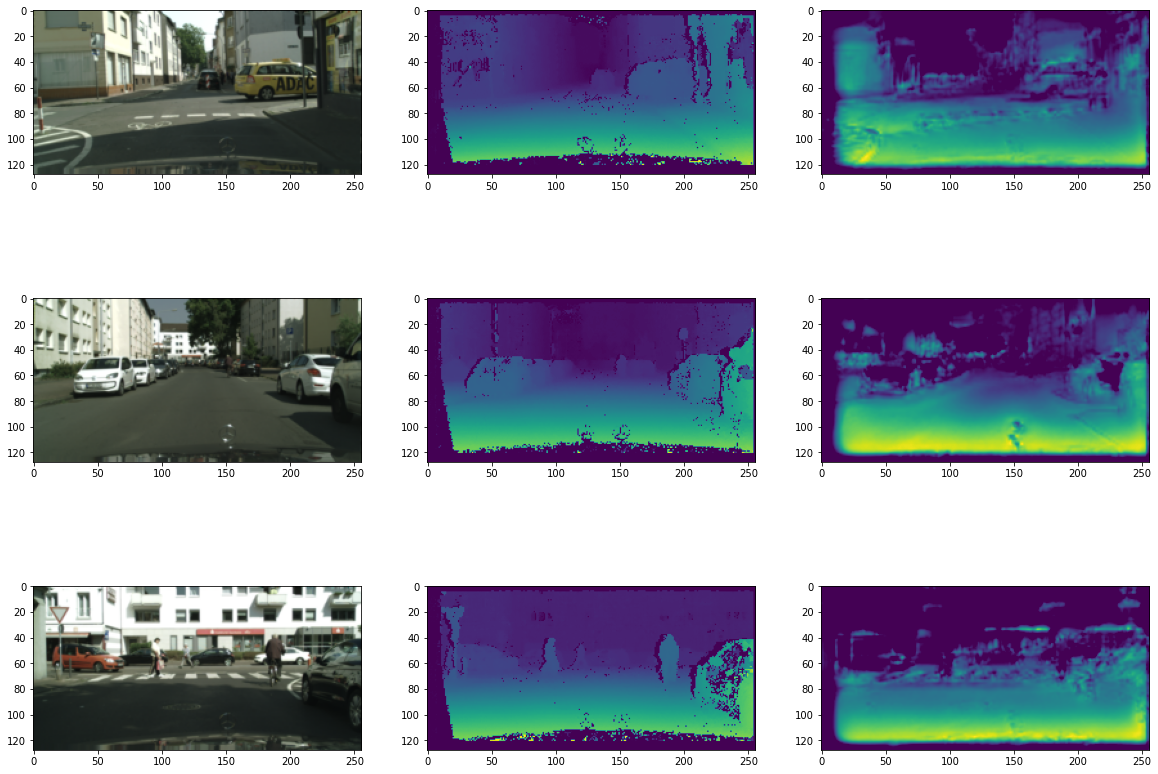

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
plt.imshow(X_test[0,:,:,:])
plt.subplot(3,3,2)
plt.imshow(y_test[0,:,:,:].squeeze())
plt.subplot(3,3,3)
plt.imshow(prediction[0,:,:,:].squeeze())

plt.subplot(3,3,4)
plt.imshow(X_test[1,:,:,:])
plt.subplot(3,3,5)
plt.imshow(y_test[1,:,:,:].squeeze())
plt.subplot(3,3,6)
plt.imshow(prediction[1,:,:,:].squeeze())

plt.subplot(3,3,7)
plt.imshow(X_test[2,:,:,:])
plt.subplot(3,3,8)
plt.imshow(y_test[2,:,:,:].squeeze())
plt.subplot(3,3,9)
plt.imshow(prediction[2,:,:,:].squeeze())